#### Diabetes Patients 

### Load Data and Necessary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pandas.plotting import radviz


In [8]:
col_name = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome (Dependent)']
df = pd.read_csv('diabetes.csv',header=0,names=col_name)

### Data Exploration and Pre-Processing

In [9]:
df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome (Dependent)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome (Dependent)         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.duplicated().sum()

0

In [12]:
df['Outcome (Dependent)'].value_counts()

Outcome (Dependent)
0    500
1    268
Name: count, dtype: int64

In [13]:
df.groupby('Outcome (Dependent)').agg(['mean','max'])

Pregnancies         Glucose      Blood Pressure       \
                           mean max        mean  max           mean  max   
Outcome (Dependent)                                                        
0                      3.298000  13  109.980000  197      68.184000  122   
1                      4.865672  17  141.257463  199      70.824627  114   

                    Skin Thickness         Insulin             BMI        \
                              mean max        mean  max       mean   max   
Outcome (Dependent)                                                        
0                        19.664000  60   68.792000  744  30.304200  57.3   
1                        22.164179  99  100.335821  846  35.142537  67.1   

                    Diabetes Pedigree Function               Age      
                                          mean    max       mean max  
Outcome (Dependent)                                                   
0                                     0.429734  2.329  31.190000  81  
1                                     0.550500  2.420  37.067164  70

### Data Visualization

<Axes: >

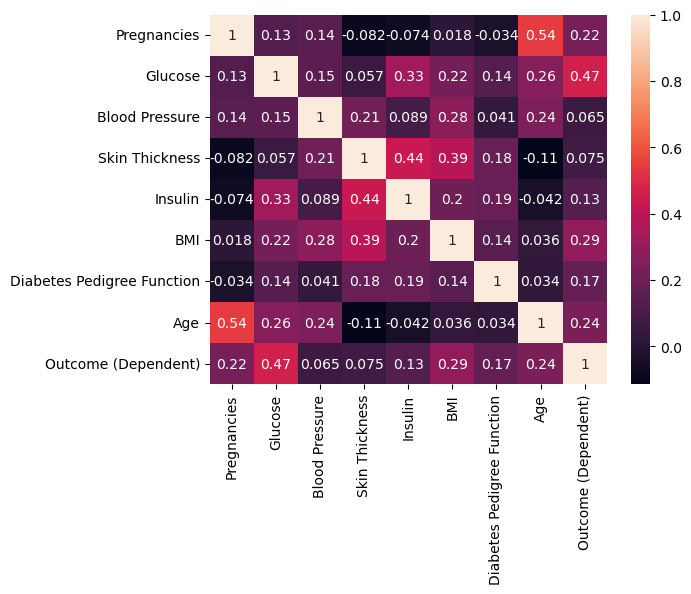

In [14]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

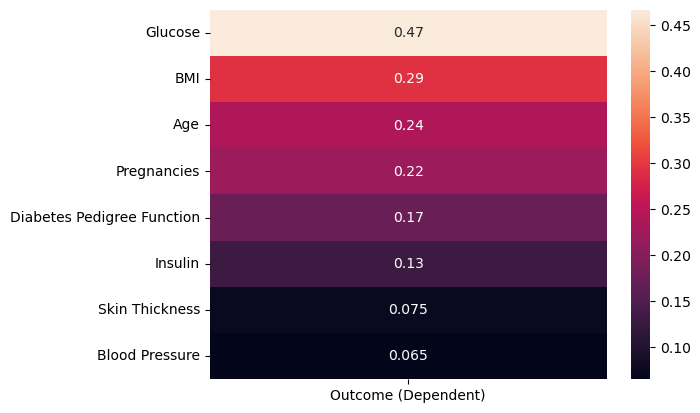

In [15]:
corr = df.corr()
target = corr['Outcome (Dependent)'].drop('Outcome (Dependent)')
sort_target = target.sort_values(ascending=False)
sns.heatmap(sort_target.to_frame(),annot=True)

/Users/choten/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


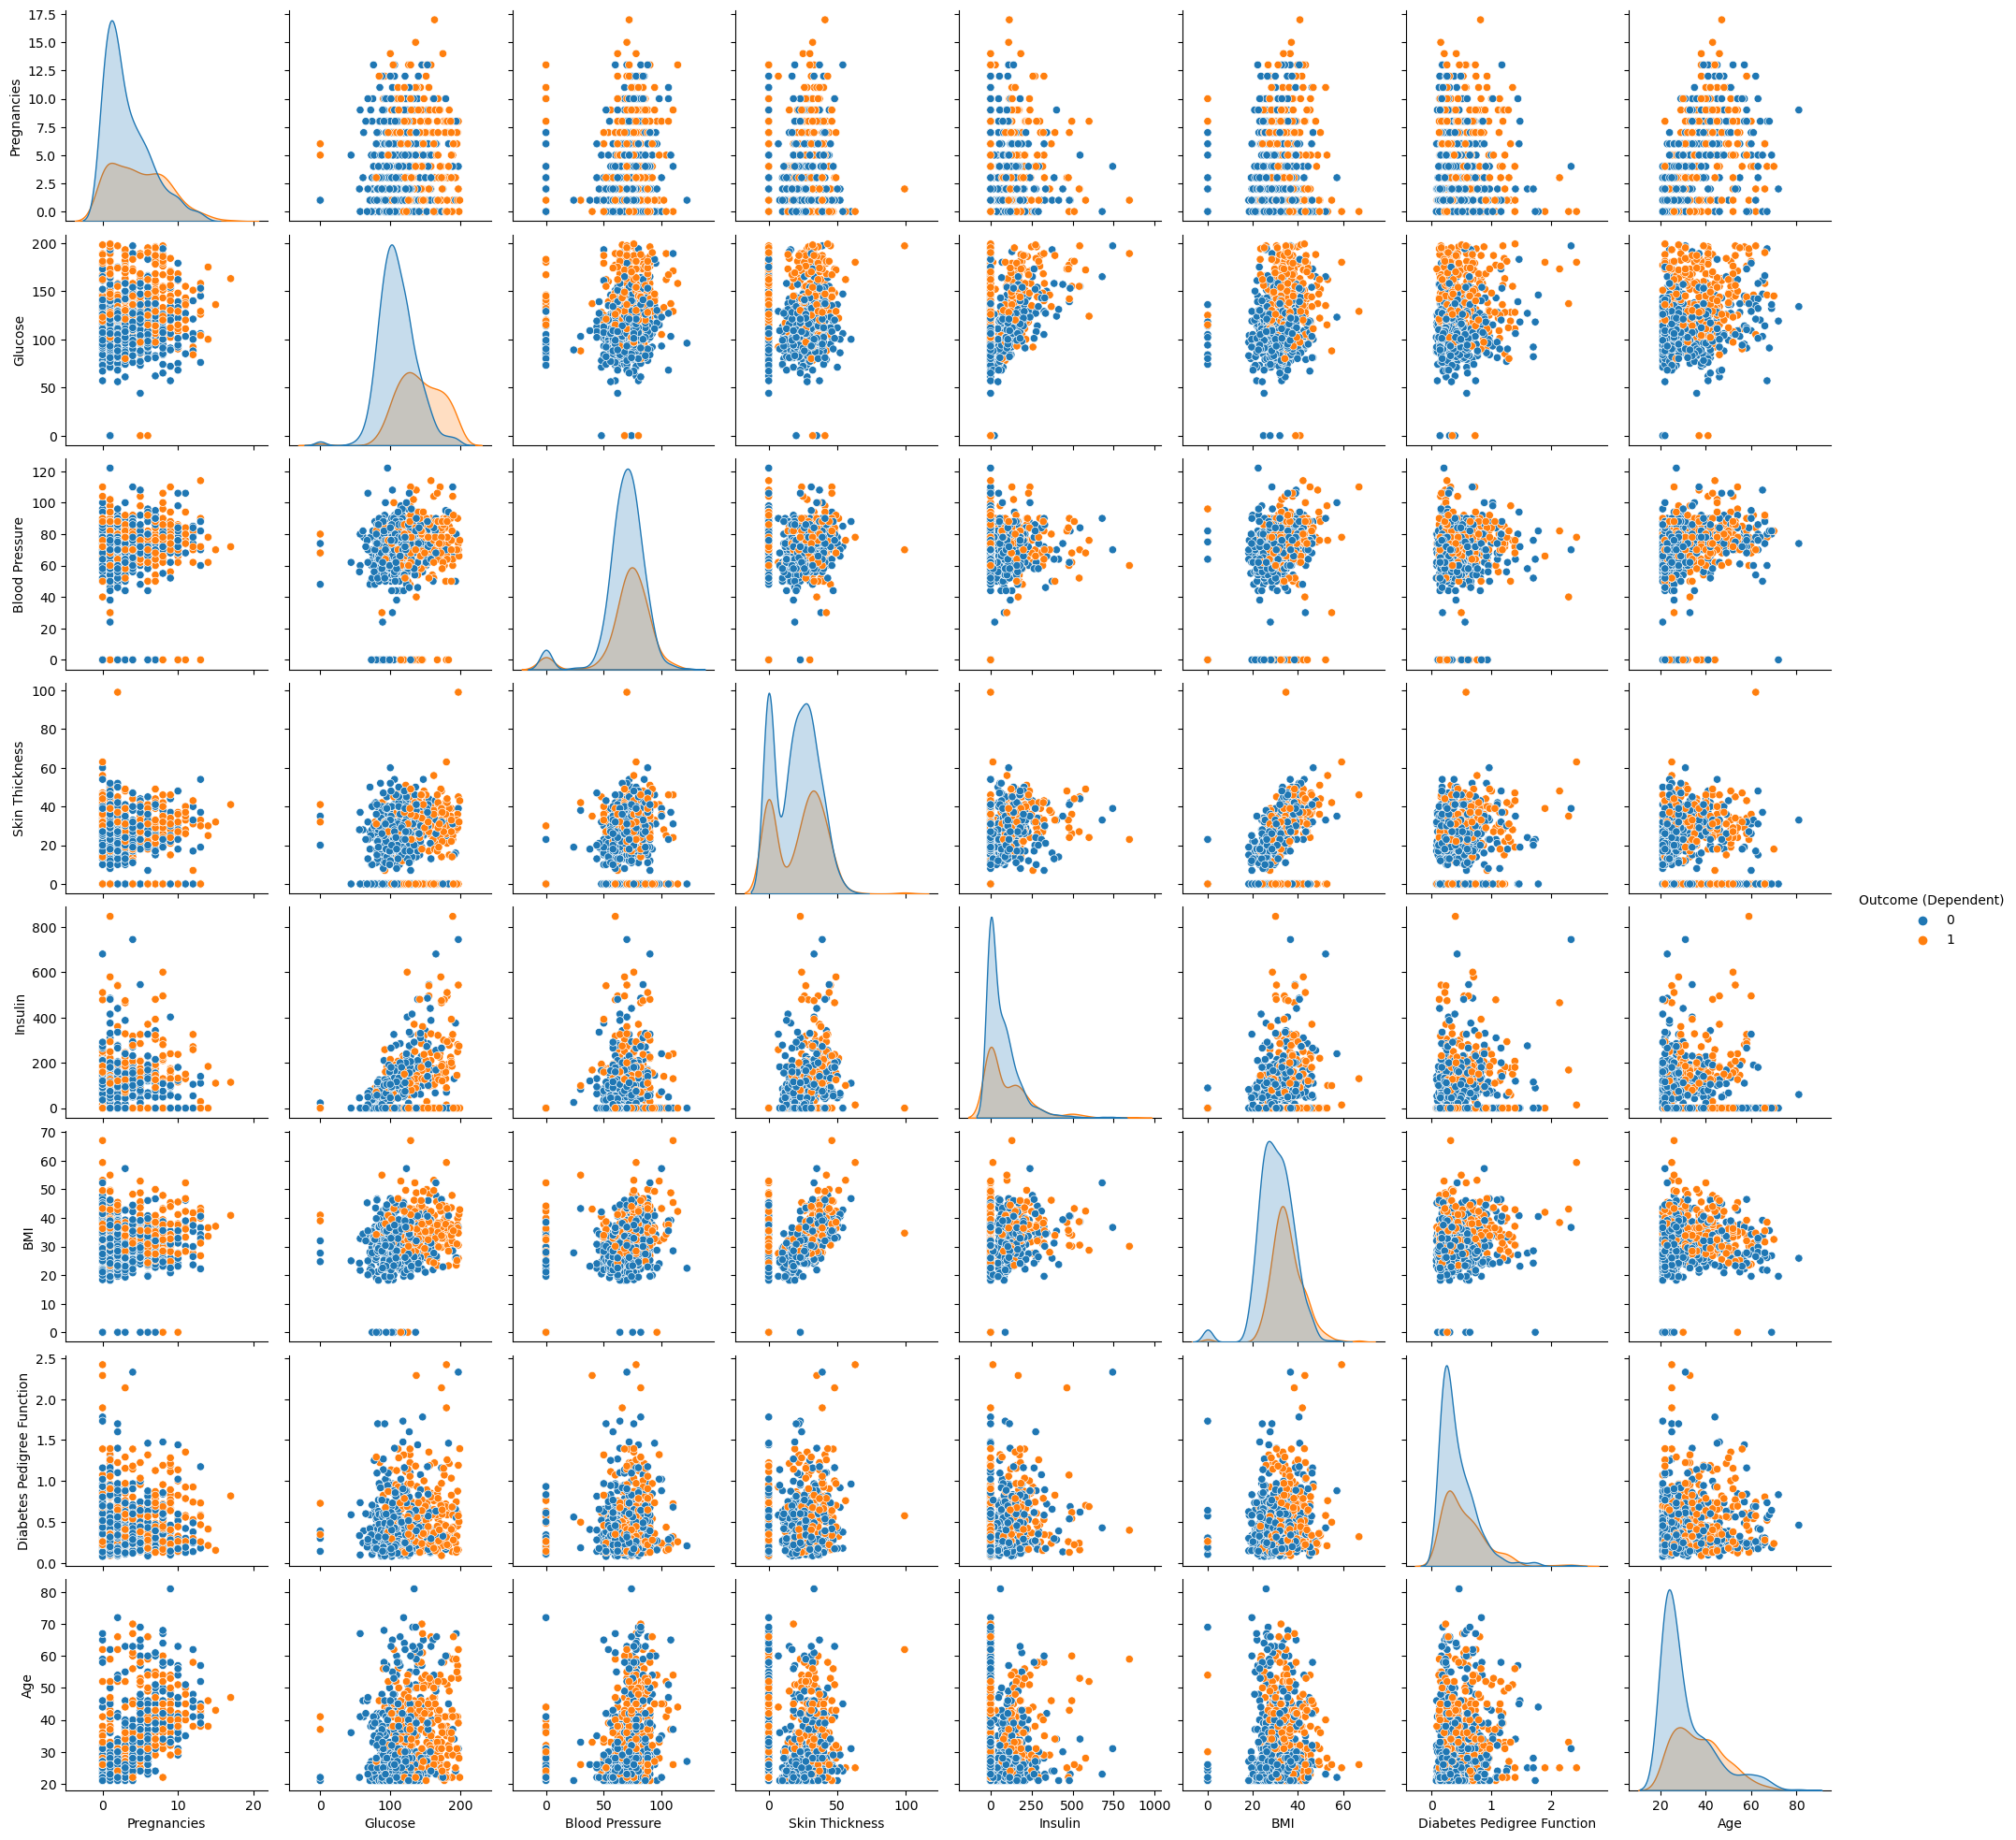

In [16]:
sns.pairplot(data=df,hue='Outcome (Dependent)')
plt.show()

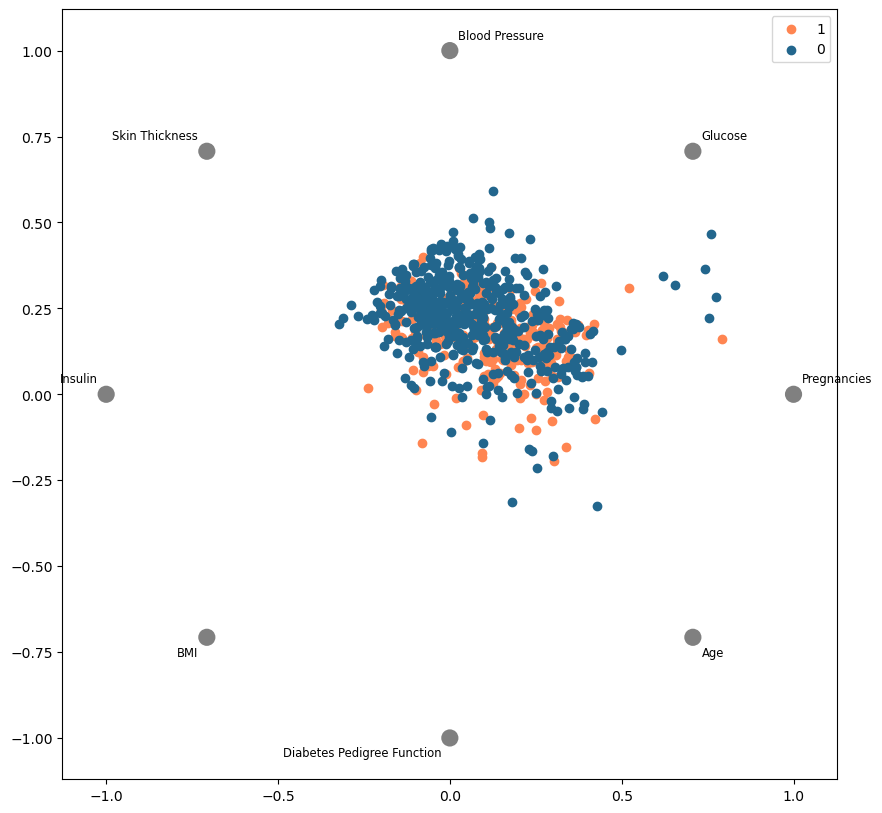

In [17]:
plt.figure(figsize=(10,10))
radviz(df,'Outcome (Dependent)',color=['#FF8551','#22668D'])
plt.show()

### Model Building and Evaluation

In [18]:
X = df.drop(columns='Outcome (Dependent)')
y = df['Outcome (Dependent)']

In [19]:
X.shape,y.shape

((768, 8), (768,))

In [20]:
selector = SelectPercentile(score_func=chi2,percentile=85).fit(X,y)
selector.get_support()

array([ True,  True, False,  True,  True,  True, False,  True])

In [21]:
selected_features = X.columns[selector.get_support()]
selected_data = df[selected_features]

In [22]:
selected_data

,Pregnancies,Glucose,Skin Thickness,Insulin,BMI,Age
0,6,148,35,0,33.6,50
1,1,85,29,0,26.6,31
2,8,183,0,0,23.3,32
3,1,89,23,94,28.1,21
4,0,137,35,168,43.1,33
...,...,...,...,...,...,...
763,10,101,48,180,32.9,63
764,2,122,27,0,36.8,27
765,5,121,23,112,26.2,30
766,1,126,0,0,30.1,47


In [23]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(selected_data, y, test_size=0.25, random_state=42)

# Create a logistic regression object
clf = LogisticRegression()

# Fit the model to the data
clf.fit(selected_data, y)

LogisticRegression()

In [24]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(accuracy)

0.75
